### Temporal plots

Multipanel plot of 7 relevant travel route crimes (polar, calendar, bar) - choose hourly, month, yearly, weekly depending on data


In [5]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import os

# Load the NYPD policing data clean dataset
cwd = os.getcwd()
print(cwd)
parent_dir = os.path.dirname(cwd)
print(parent_dir)
# fpath = os.path.join(parent_dir, 'NYPD_Complaint_Data_Cleaned.csv')
path = 'C:/Users/jbh/Desktop/'
fpath = path + 'NYPD_Complaint_Data_Cleaned.csv'    

df = pd.read_csv(fpath)
df_cleaned = df.copy()

c:\Users\jbh\Desktop\SocialData_FinalProject\data_analysis_and_preprocessing
c:\Users\jbh\Desktop\SocialData_FinalProject


In [ ]:
df.head()

,Complaint_ID,Complaint_From_Date,Complaint_From_Time,Complaint_To_Date,Complaint_To_Time,Precinct,Report_Date,Offense_Code,Offense_Description,Internal_Classification_Code,...,Suspect_Age_Group,Suspect_Race,Suspect_Sex,Latitude,Longitude,Lat_Lon,Patrol_Borough,Victim_Age_Group,Victim_Race,Victim_Sex
0,16784525,06/17/2006,00:30:00,NaN,NaN,6.0,06/18/2006,578,HARRASSMENT 2,638.0,...,45-64,WHITE,F,40.734091,-74.006238,"(40.734091, -74.006238)",PATROL BORO MAN SOUTH,45-64,WHITE,F
1,10973318,04/06/2006,09:30:00,NaN,NaN,6.0,04/12/2006,578,HARRASSMENT 2,638.0,...,18-24,WHITE,F,40.741288,-74.006167,"(40.741288, -74.006167)",PATROL BORO MAN SOUTH,45-64,WHITE,F
2,23859785,08/12/2006,11:29:00,NaN,NaN,20.0,08/12/2006,105,ROBBERY,361.0,...,NaN,WHITE,M,40.775083,-73.982182,"(40.775083, -73.982182)",PATROL BORO MAN NORTH,NaN,NaN,D
3,16544671,05/22/2006,16:30:00,NaN,NaN,47.0,05/22/2006,105,ROBBERY,380.0,...,NaN,BLACK,M,40.903862,-73.846994,"(40.903862, -73.846994)",PATROL BORO BRONX,25-44,WHITE,M
4,27287587,03/07/2007,16:10:00,NaN,NaN,14.0,03/07/2007,105,ROBBERY,361.0,...,NaN,BLACK,M,40.755640,-73.990952,"(40.75564, -73.990952)",PATROL BORO MAN SOUTH,NaN,NaN,D


In [6]:
# Use all offence descriptions as focus crimes
focuscrimes = df['Offense_Description'].unique()
print(focuscrimes)

#focus_crimes = df['Offense_Description'].value_counts().head(12)
#df_focus = df[df['Offense_Description'].isin(focus_crimes.index)]


['HARRASSMENT 2' 'ROBBERY' 'GRAND LARCENY' 'ASSAULT 3 & RELATED OFFENSES'
 'MISCELLANEOUS PENAL LAW' 'PETIT LARCENY' 'RAPE' 'FELONY ASSAULT'
 'FRAUDS' 'FORGERY' 'DANGEROUS DRUGS' 'BURGLARY' 'DANGEROUS WEAPONS'
 'POSSESSION OF STOLEN PROPERTY' 'CRIMINAL MISCHIEF & RELATED OF'
 'OFF. AGNST PUB ORD SENSBLTY &' 'VEHICLE AND TRAFFIC LAWS'
 'INTOXICATED & IMPAIRED DRIVING' 'GRAND LARCENY OF MOTOR VEHICLE'
 'OFFENSES AGAINST PUBLIC ADMINI' 'THEFT-FRAUD'
 'UNAUTHORIZED USE OF A VEHICLE' 'CRIMINAL TRESPASS'
 'OFFENSES INVOLVING FRAUD' 'SEX CRIMES']


C:\Users\jbh\AppData\Local\Temp\ipykernel_16848\3822214992.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted(df['Year'].unique()), rotation=90)  # Set year names as x-tick labels
C:\Users\jbh\AppData\Local\Temp\ipykernel_16848\3822214992.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted(df['Year'].unique()), rotation=90)  # Set year names as x-tick labels
C:\Users\jbh\AppData\Local\Temp\ipykernel_16848\3822214992.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted(df['Year'].unique()), rotation=90)  # Set year names as x-tick labels
C:\Users\jbh\AppData\Local\Temp\ipykernel_16848\3822214992.py:28: UserWarning: set_ticklabels() should only be used with a f

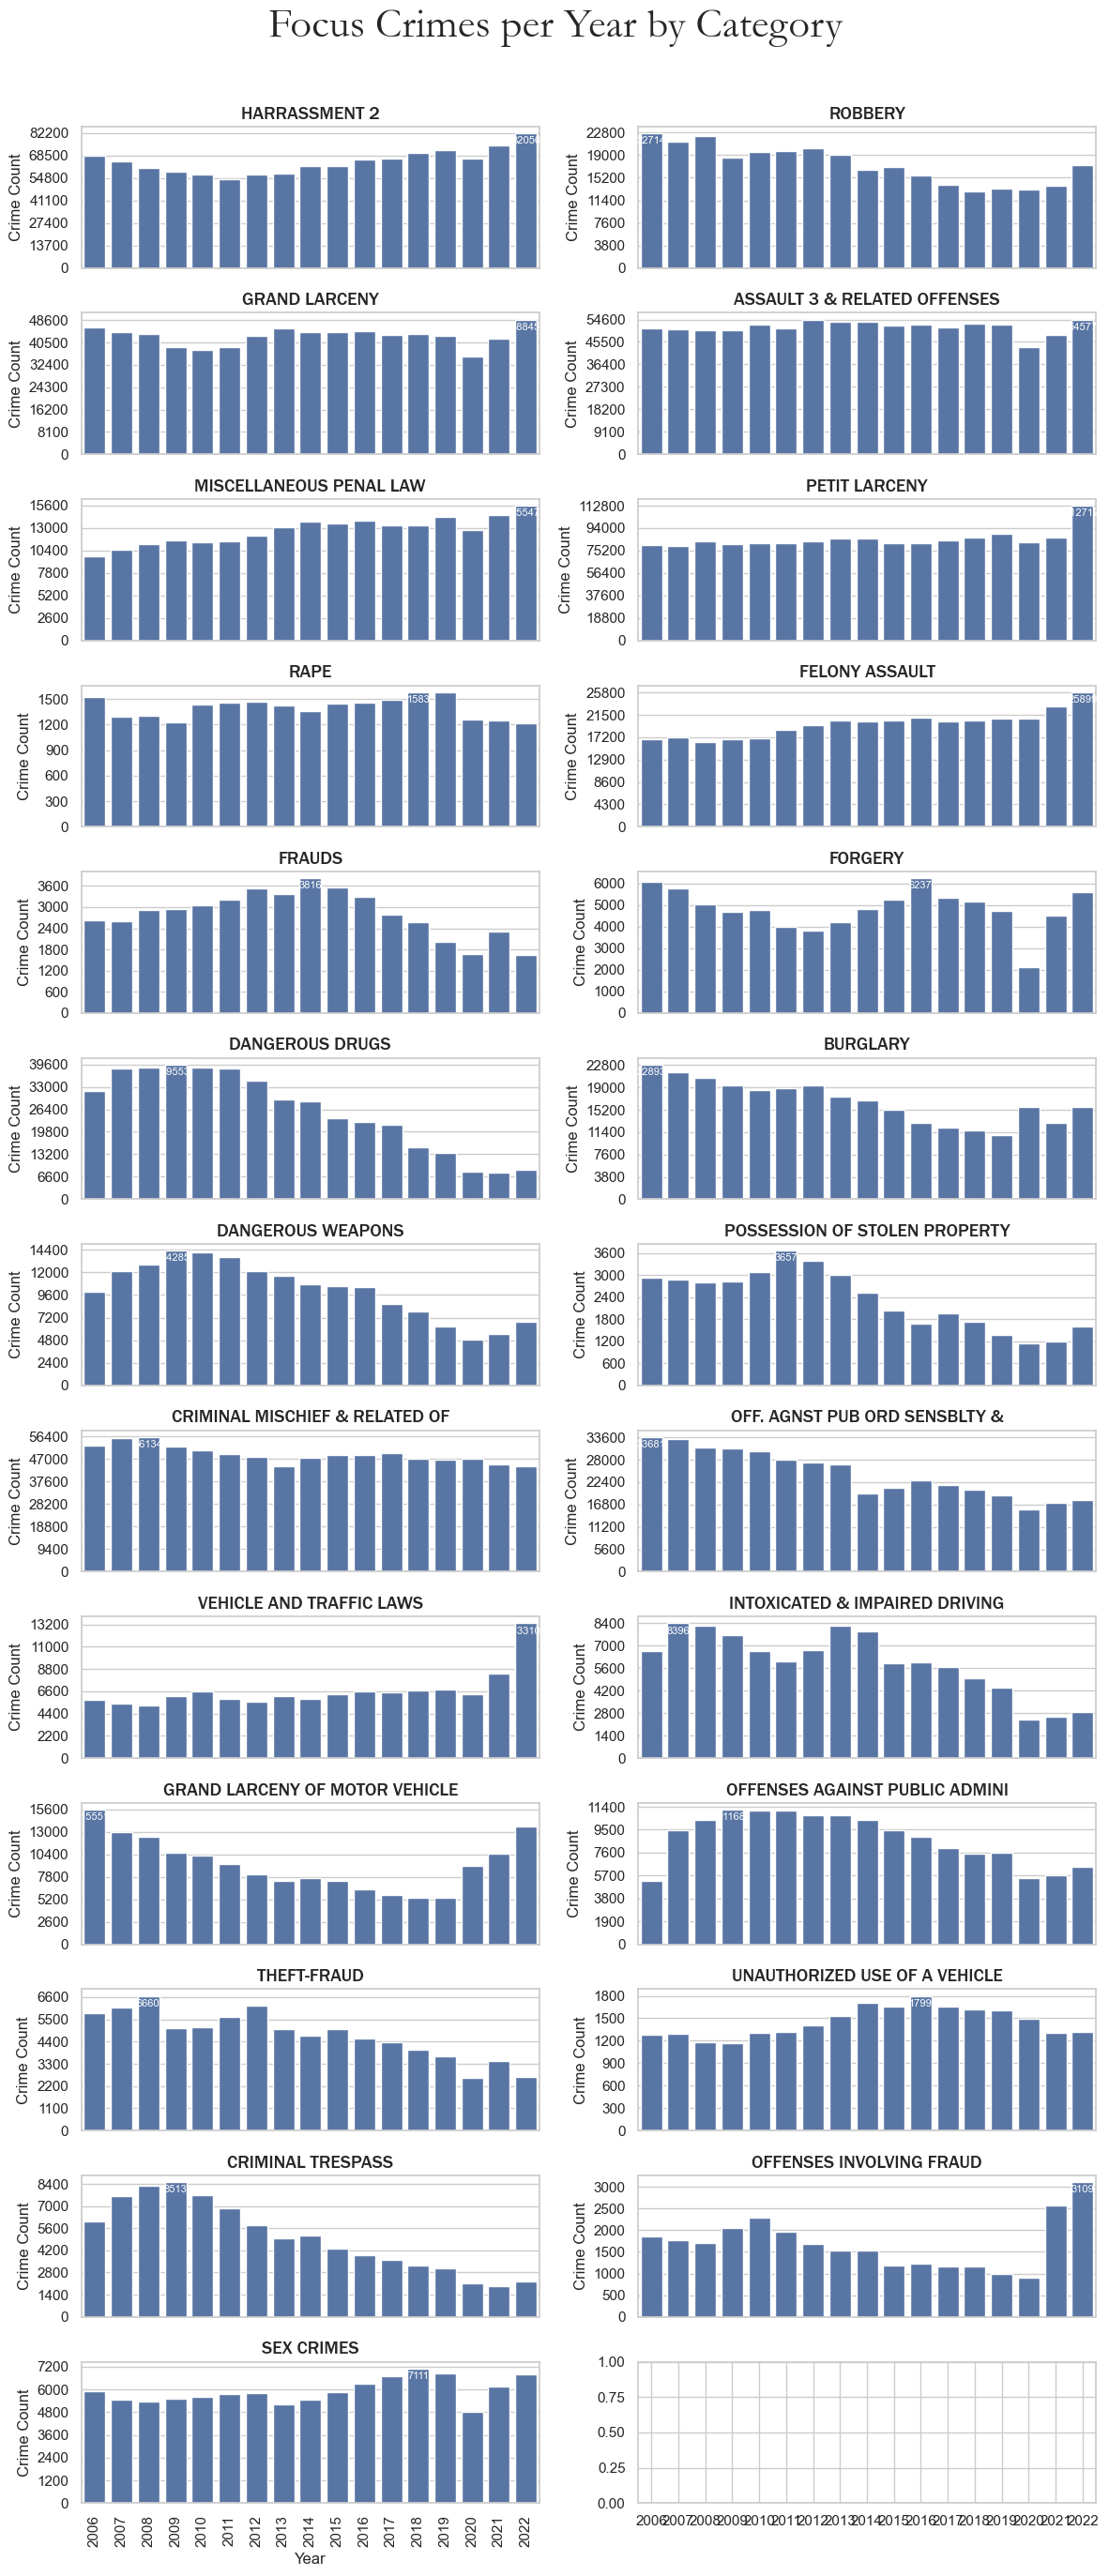

In [7]:
### Yearly Plots ###
sns.set(style="whitegrid")  # Setting the seaborn style
sns.color_palette("hls", 12, desat=1)  # Set color palette, adjust the number if needed for better differentiation

fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(12, 28), sharex=True)
fig.suptitle('Focus Crimes per Year by Category', fontdict={'fontname': 'Garamond', 'weight': 'bold'}, size=32)
fig.subplots_adjust(top=0.95, hspace=0.5)

# Prepare the data by extracting the year from the 'Complaint_From_Date'
df['Year'] = pd.to_datetime(df['Complaint_From_Date']).dt.year
yearly_mapping = {year: i for i, year in enumerate(sorted(df['Year'].unique()))}  # Adjust for the actual years in your data

for i, crime in enumerate(focuscrimes):
    ax = axes[i // 2, i % 2]
    crime_data = df[df['Offense_Description'] == crime]
    y = crime_data['Year'].value_counts().sort_index()
    
    sns.countplot(x='Year', data=crime_data, ax=ax, order=sorted(df['Year'].unique()))

    # annotate the the max count on the plot
    max_count = y.max()
    max_year = y.idxmax()  # get the year with max count
    max_year_index = yearly_mapping[max_year]  # get the index of the year with max count
    ax.text(max_year_index, max_count - max_count/11, f'{max_count}', ha='center', va='bottom', fontsize=8, color='white')

    ax.set_xlabel("Year" if i >= len(focuscrimes) - 2 else "")  # Only label bottom plot of each column
    ax.set_ylabel("Crime Count")
    ax.set_xticklabels(sorted(df['Year'].unique()), rotation=90)  # Set year names as x-tick labels
    ax.set_yticks(np.arange(0, max_count + max_count / 10, round(max_count / 6, -2)))  # Adjust y-ticks
    ax.set_title(crime, fontdict={'fontname': 'Franklin Gothic Medium', 'fontsize': 14})
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the rect to fit the suptitle
plt.show()


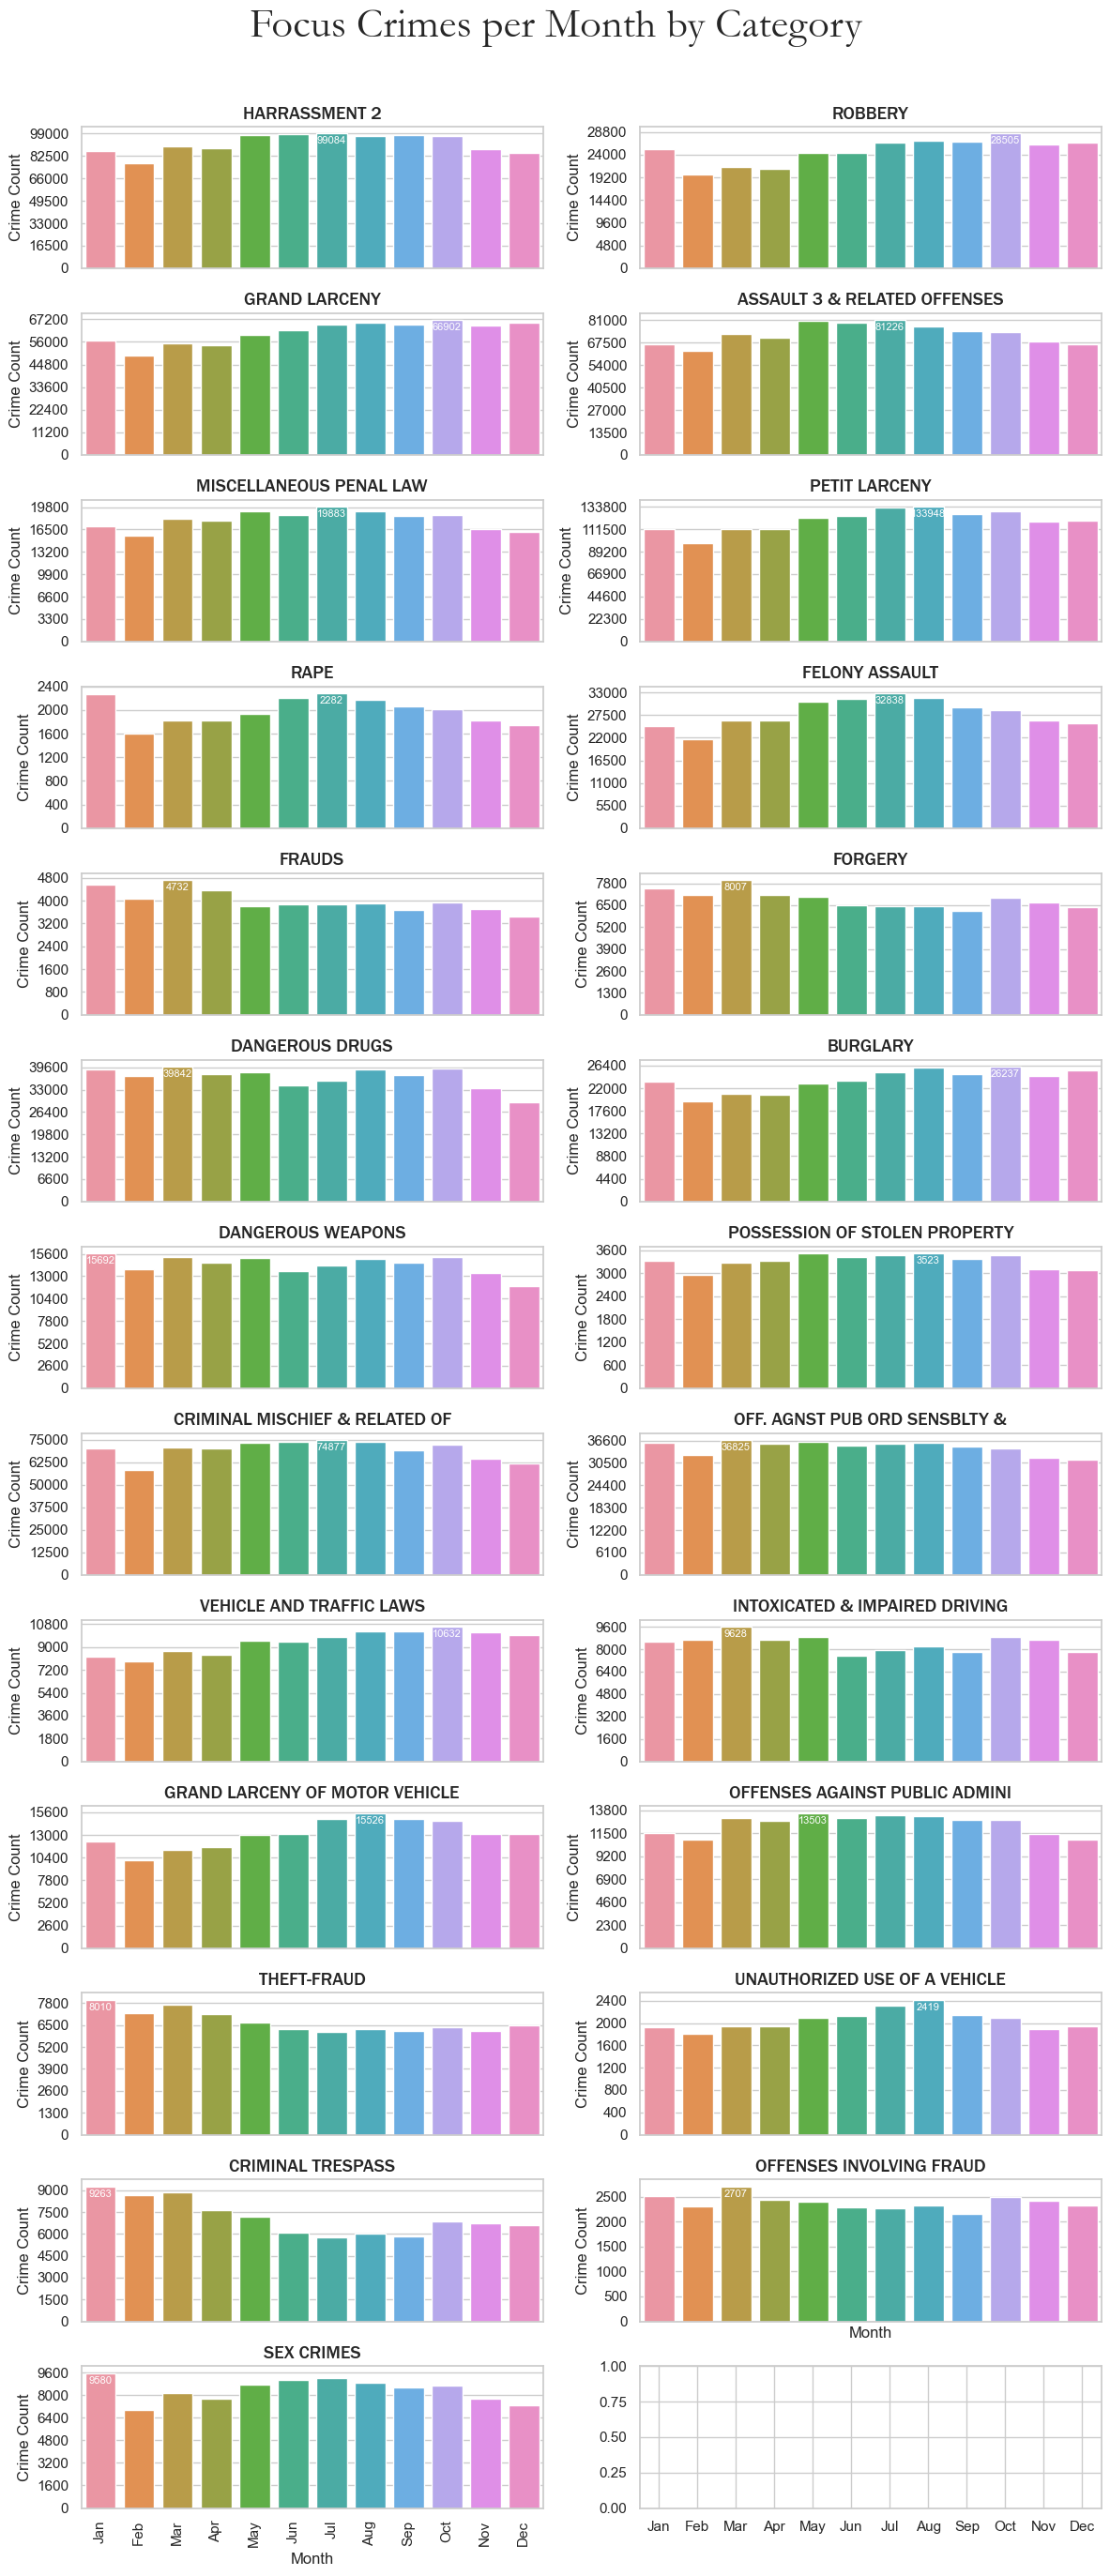

In [ ]:
### Months Plots###
# set seasonal color palette using hues for categorical data but also sequential because of inherent time data (hues makes it easier to recognise a month across subplots)
sns.color_palette("hls", 12, desat=1) # reduce saturation (less bright) for consistency with previous plot
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(12, 28), sharex=True)
fig.suptitle('Focus Crimes per Month by Category', fontdict={'fontname': 'Garamond', 'weight': 'bold'}, size=32)
fig.subplots_adjust(top=0.95, hspace=0.5)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#monthly_mapping = {'January': 0, 'February': 1, 'March': 2, 'April': 3, 'May': 4, 'June': 5, 'July': 6, 'August': 7, 'September': 8, 'October': 9, 'November': 10, 'December': 11}
monthly_mapping = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11}

for i, crime in enumerate(focuscrimes):
    ax = axes[i//2, i%2]
    # Convert 'Date' to datetime and extract month
    x = pd.to_datetime(df[df['Offense_Description'] == crime]['Complaint_From_Date'], format='%m/%d/%Y').dt.month
    x = x.astype('category').cat.set_categories(range(1, 13), ordered=True)
    y = x.value_counts().sort_index()
    sns.countplot(x=x, order=range(1, 13), ax=ax)

    # annotate the the max count on the plot
    max_count = y.max()
    max_month = y.idxmax() # get the day with max count
    max_month_index = monthly_mapping[max_month] # get the index of the day with max count
    ax.text(max_month_index, max_count - max_count/11, max_count, ha='center', va='bottom', fontsize=8, color='white') # place annotation just under top of max bar

    ax.set_xlabel("Month" if i >= len(focuscrimes) - 2 else "") # Only label bottom plot of each column
    ax.set_ylabel("Crime Count")
    ax.set_xticklabels(month_names, rotation=90)  # Set month names as x-tick labels
    ax.set_yticks(np.arange(0, y.max()+y.max()/10, round(y.max()/6, -2)))  # Adjust y-ticks
    ax.set_title(crime, fontdict={'fontname': 'Franklin Gothic Medium', 'fontsize': 14})
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the rect to fit the suptitle
plt.show()

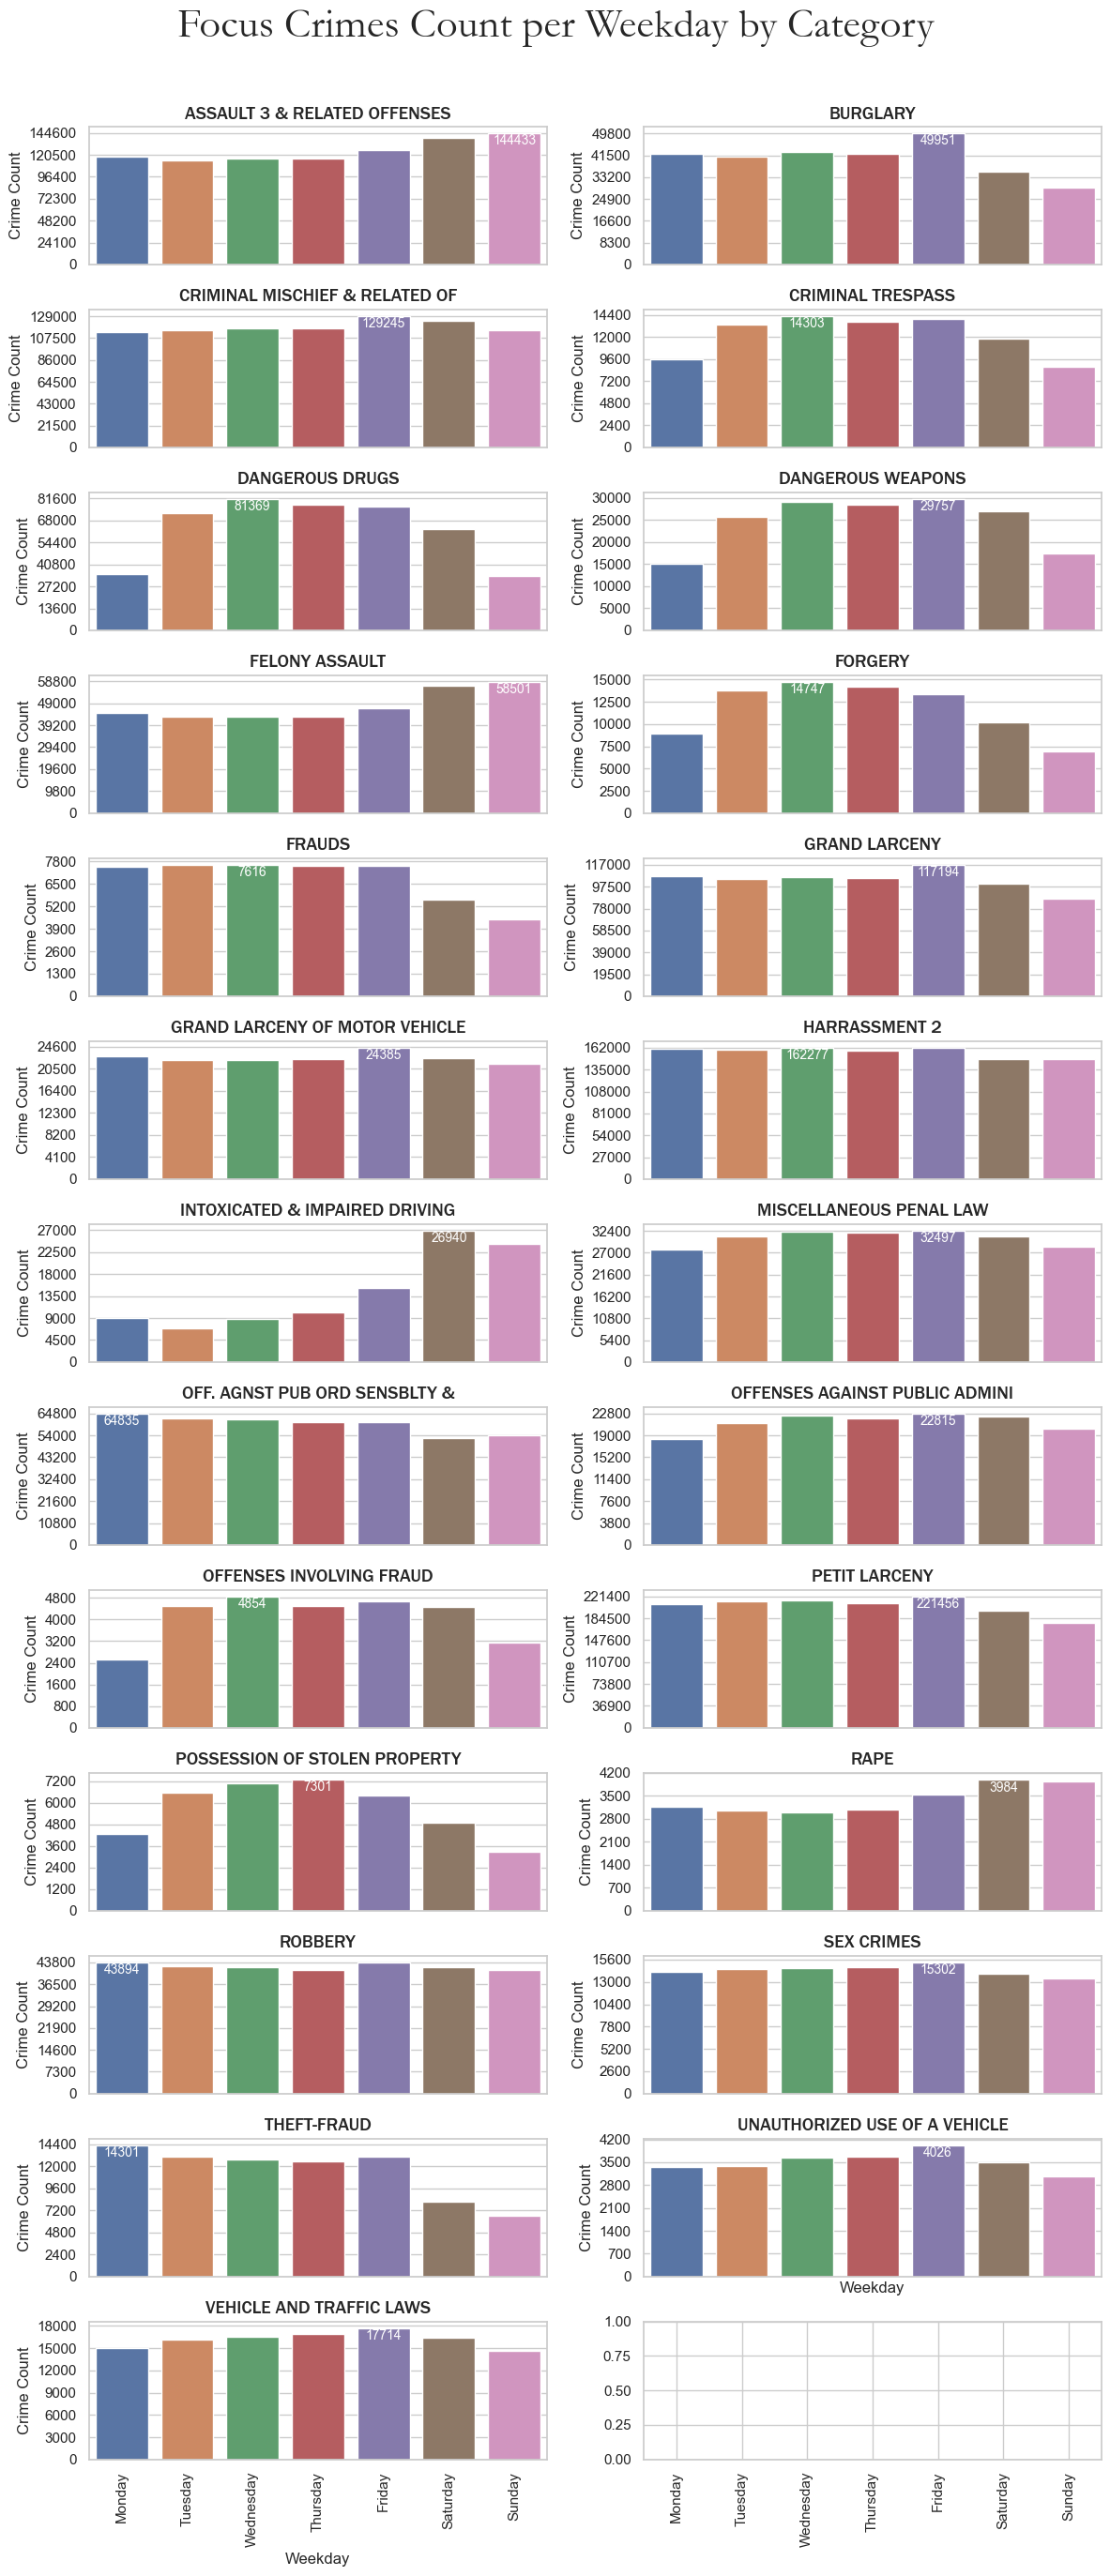

In [ ]:
# Choose a subset of focus crimes
#focuscrimes = ['HARRASSMENT 2', 'PETIT LARCENY', 'GRAND LARCENY', 'ASSAULT 3 & RELATED OFFENSES']
#focus_crimes = df['Offense_Description'].value_counts().head(14).index.tolist()
#print(focus_crimes)

### Weekday Plot ###
sns.set_theme(style="whitegrid")
#sns.set_theme(style="darkgrid")
sns.color_palette("hls", 7) # 7 hues for categorical data
# Plot number of crimes per week day in subplots with shared x-axis
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(12, 28), sharex=True)
fig.suptitle('Focus Crimes Count per Weekday by Category', fontdict={'fontname': 'Garamond', 'weight': 'bold'}, size=32) # Large Serif font for capturing title
fig.subplots_adjust(top=0.95, hspace=0.5)  # Adjust the spacing to prevent overlap
focuscrimes = sorted(focuscrimes) # alphabetically sort focuscrimes for consistent order in subplots
weekday_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}


# create DayOfWeek column using 'Complaint_From_Date 
df['Complaint_From_Date'] = pd.to_datetime(df['Complaint_From_Date'])
df['DayOfWeek'] = df['Complaint_From_Date'].dt.day_name()

for i, crime in enumerate(focuscrimes):
    ax = axes[i//2, i%2]
    x = df[df['Offense_Description'] == crime]['DayOfWeek']  
    x = x.astype('category')
    x.cat.set_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
    y = x.value_counts().sort_index()
    sns.countplot(x=x, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=ax) #color='b' if using same colour for all bars
    
    # annotate the the max count on the plot
    max_count = y.max()
    max_day = y.idxmax() # get the day with max count
    max_day_index = weekday_mapping[max_day] # get the index of the day with max count
    ax.text(max_day_index, max_count - max_count/9, max_count, ha='center', va='bottom', fontsize=10, color='white') # place annotation just under top of max bar

    ax.set_xlabel("Weekday" if i >= len(focuscrimes) - 2 else "") # Only label bottom plot of each column
    ax.set_ylabel("Crime Count") 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-ticks
    ax.set_yticks(np.arange(0, y.max()+y.max()/10, round(y.max()/6,-2)))  # Adjust to only 7 y-ticks and must be multiples of 100
    ax.set_title(crime, fontdict={'fontname':'Franklin Gothic Medium', 'fontsize': 14}) # smaller sans-serif font for easy reading of subplots title
plt.xticks(rotation=90)  
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the rect to fit the suptitle
plt.show()

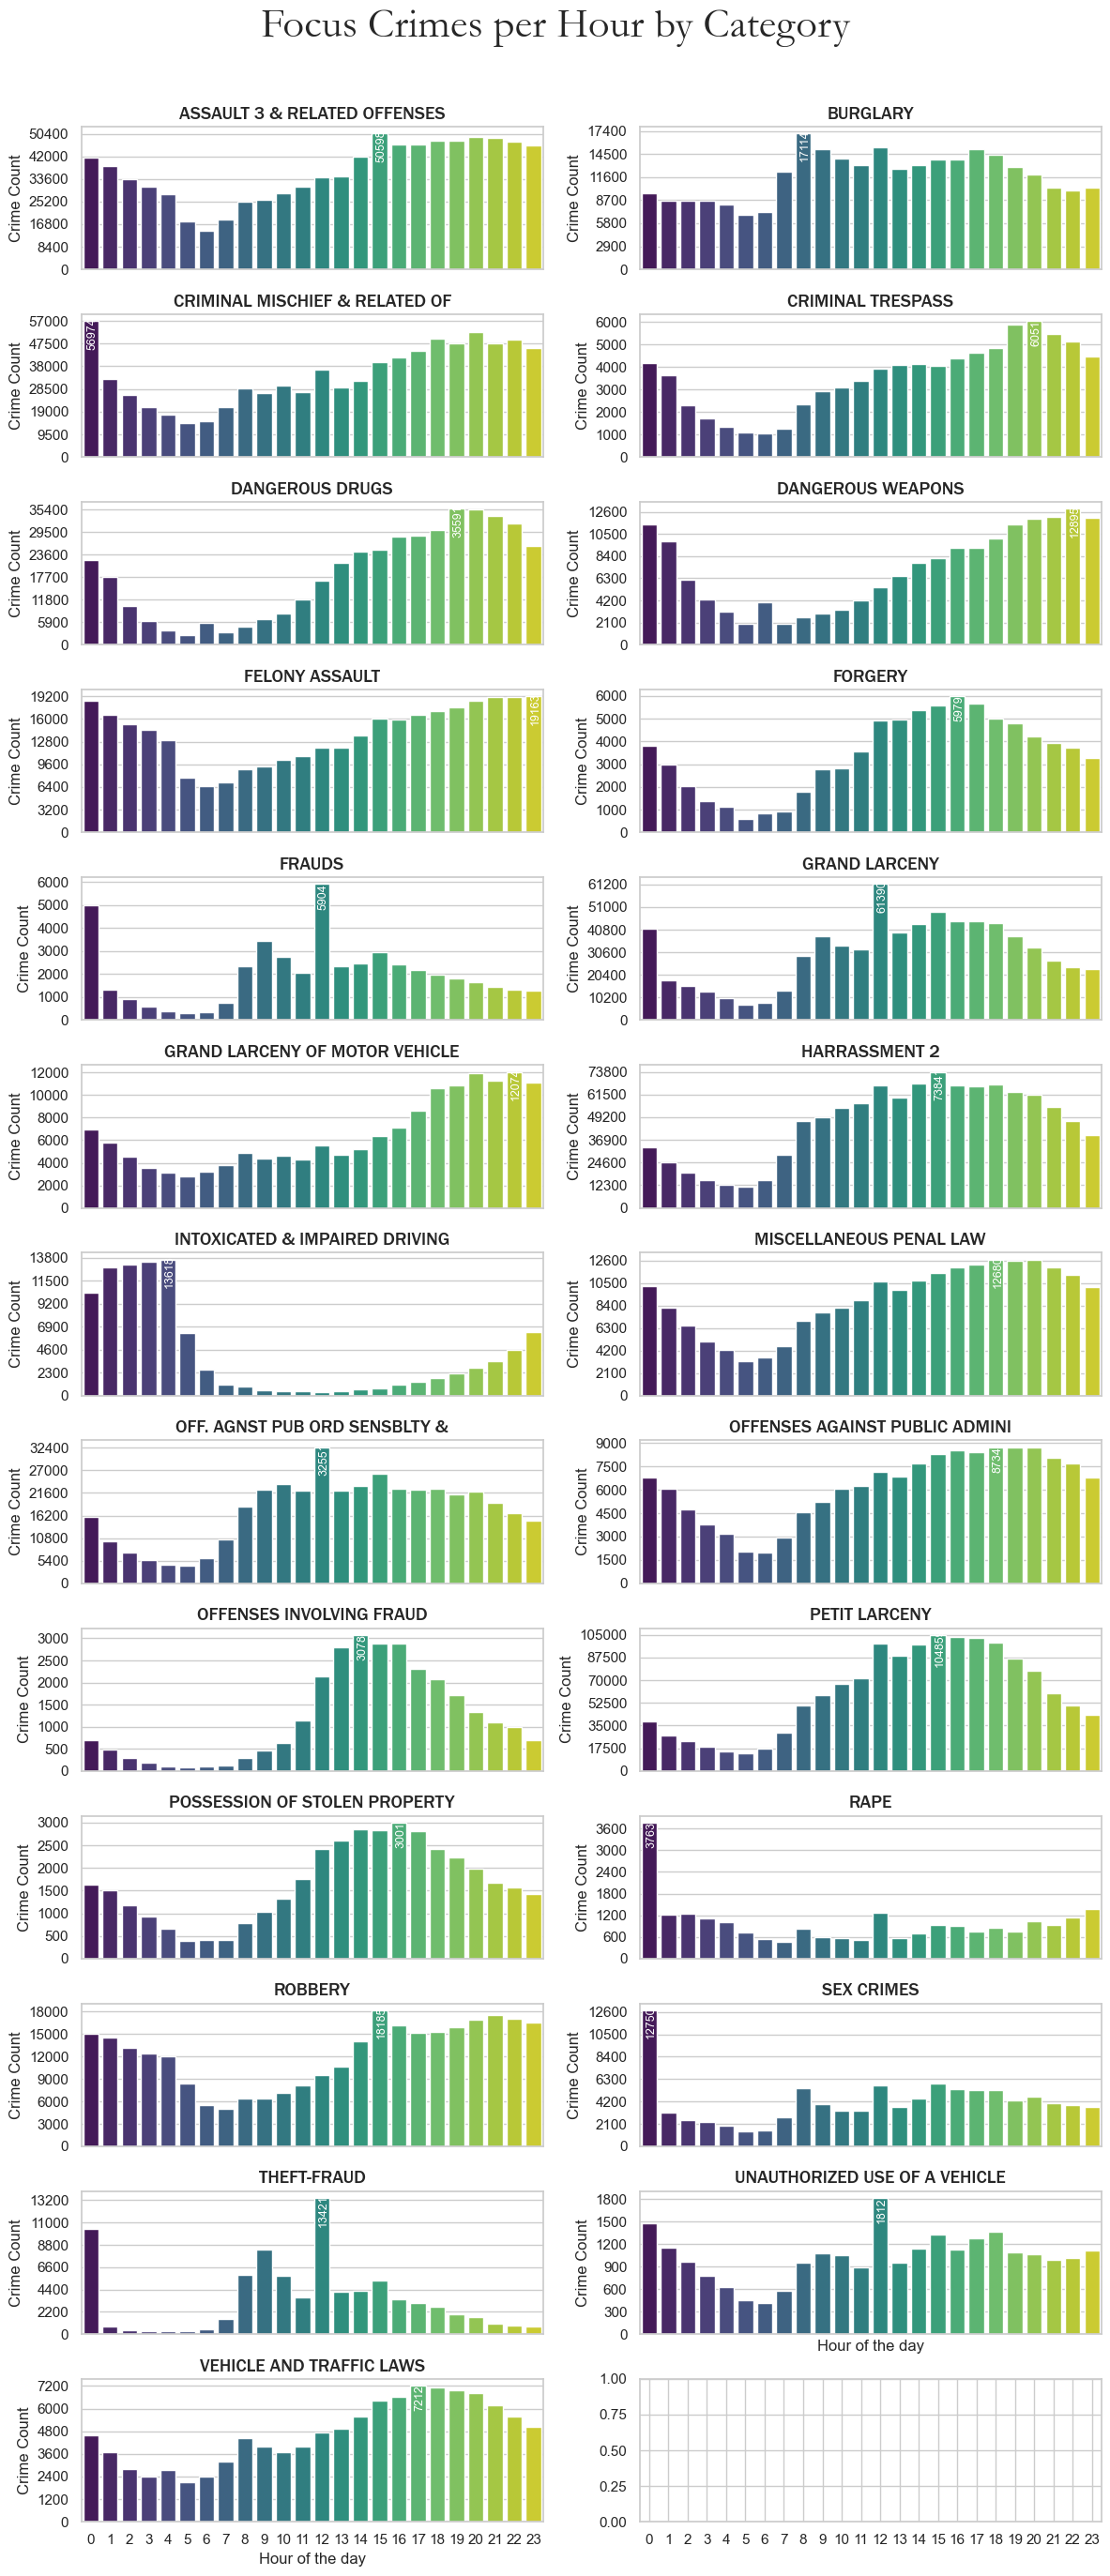

In [ ]:
### 24-hour Plot ###
sns.set_palette('viridis') # 24 hours is more sequential than categorical therefore viridis is good
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(12, 28), sharex=True)
fig.suptitle('Focus Crimes per Hour by Category', fontdict={'fontname': 'Garamond', 'weight': 'bold'}, size=32)
fig.subplots_adjust(top=0.95, hspace=0.5)
hour_names = [f'{i}' for i in range(24)]

# harassment_data = df[df['Offense_Description'] == 'HARRASSMENT 2']
# # Extract hour information from the 'Time' column
# #df['DayOfWeek'] = df['Complaint_From_Date'].dt.day_name()
# #harassment_data['Hour'] = df['Complaint_From_Date'].dt.hour
# Complaint_from_date data is formatted as such 06/18/2006
# # Complaint_From_Time 16:30:00	
# harassment_data['Hour'] = pd.to_datetime(harassment_data['Complaint_From_Time'], format='%H:%M:%S').dt.hour

for i, crime in enumerate(focuscrimes):
    ax = axes[i//2, i%2]
    # Convert 'Time' to datetime and extract hour
    x = pd.to_datetime(df[df['Offense_Description'] == crime]['Complaint_From_Time'], format='%H:%M:%S').dt.hour
    x = x.astype('category').cat.set_categories(range(24), ordered=True)
    y = x.value_counts().sort_index()
    sns.countplot(x=x, order=range(24), ax=ax, palette='viridis')

    # annotate the the max count on the plot
    max_count = y.max()
    max_hour = y.idxmax() # get the day with max count
    ax.text(max_hour+0.1, max_count - max_count/11, max_count, ha='center', va='center', fontsize=9, color='white', rotation=90) # place annotation just under top of max bar

    ax.set_xlabel("Hour of the day" if i >= len(focuscrimes) - 2 else "")  # Only label bottom plot of each column
    ax.set_ylabel("Crime Count")
    ax.set_xticklabels(hour_names, rotation=0)  # Set hour names as x-tick labels
    ax.set_yticks(np.arange(0, y.max()+y.max()/10, round(y.max()/6, -2)))  # Adjust y-ticks
    ax.set_title(crime, fontdict={'fontname': 'Franklin Gothic Medium', 'fontsize': 14})
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the rect to fit the suptitle
plt.show()


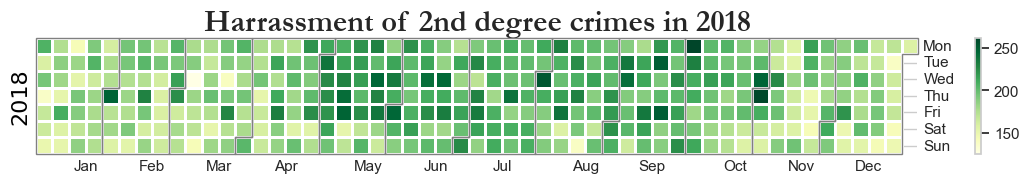

In [ ]:
# Calender plot
import calplot
import logging
logging.getLogger('matplotlib.font_manager').disabled = True # Font manager warning are irrelevant and therefore disabled
import warnings
warnings.filterwarnings("ignore") # Ignore warnings

# Filter data for Burglary crimes 2018 because it has the most data which can be seen in week 1 plots.
#df[df['Offense_Description'] == 'HARRASSMENT 2']
harrassment_data = df[(df['Offense_Description'] == 'HARRASSMENT 2') & (df['Complaint_From_Date'].dt.year == (2018))]
# Prepare events for calendar plot
all_days = pd.date_range(start=harrassment_data['Complaint_From_Date'].min(), end=harrassment_data['Complaint_From_Date'].max(), freq='D')
events = pd.Series(1, index=harrassment_data['Complaint_From_Date'])
# Plot
calplot.calplot(events, cmap='YlGn', colorbar=True, monthticks=True, yearlabel_kws={'color': 'black'}) #Yellow green is good for sequential data
plt.title('Harrassment of 2nd degree crimes in 2018', fontdict={'fontname': 'Garamond', 'weight': 'bold'}, size=22)
plt.ylabel('2018', fontsize=16, fontweight='normal')
plt.show()

Top crimes that affect travel safety in NYC:
1. Harrassment 2nd degree
2. Robbery
3. Assault 3rd degree & related offenses
4. Felony Assault
5. Petit Larceny
6. Grand Larceny
7. Sex crimes
8. Rape


Insert a bar plot with the number of each of these crimes per day on average in NYC.


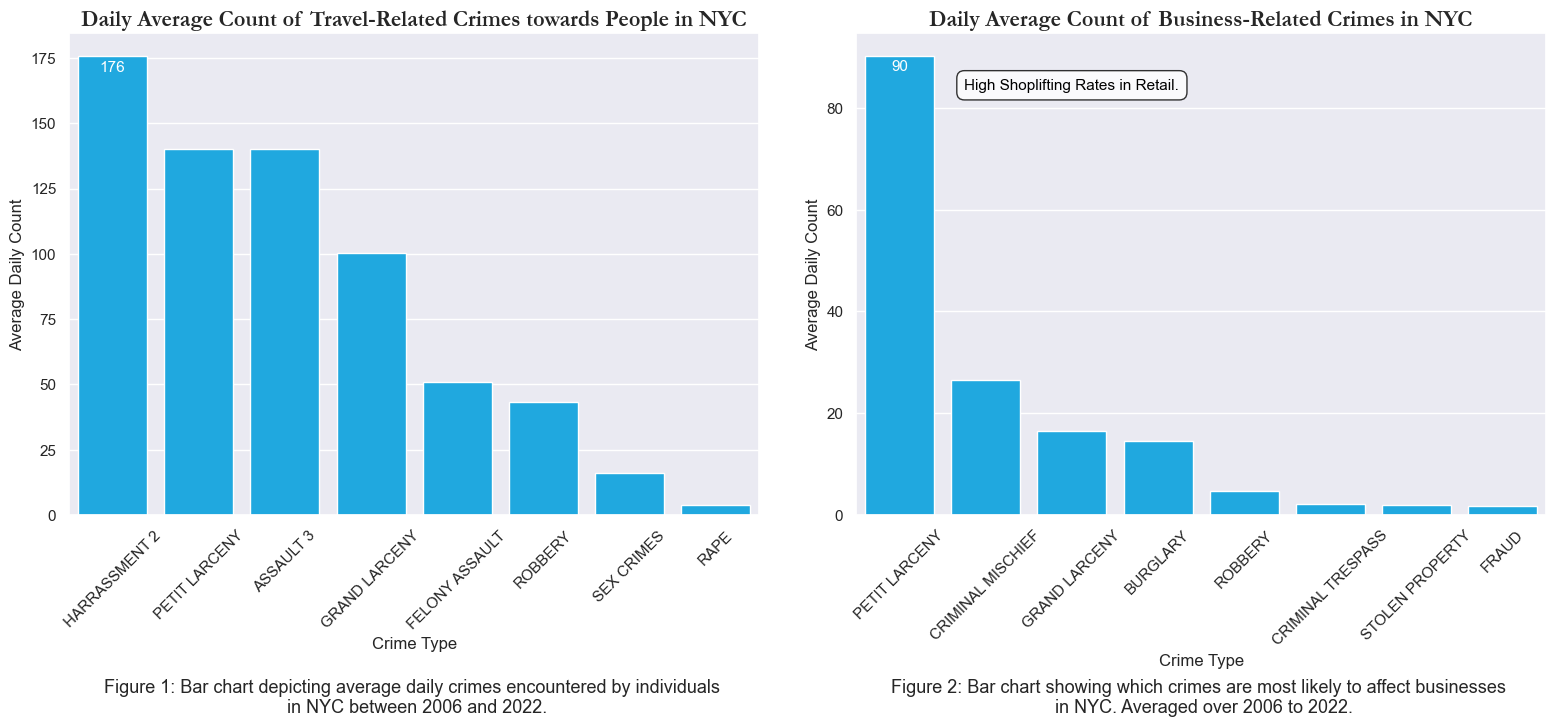

In [9]:

# rename "ASSAULT 3 & RELATED OFFENSES" to "ASSAULT 3"
df['Offense_Description'] = df['Offense_Description'].replace('ASSAULT 3 & RELATED OFFENSES', 'ASSAULT 3')
# change "Criminal Mischief & related offenses" to "CRIMINAL MISCHIEF"
df['Offense_Description'] = df['Offense_Description'].replace('CRIMINAL MISCHIEF & RELATED OF', 'CRIMINAL MISCHIEF')
# change "POSSESSION OF STOLEN PROPERTY" to "STOLEN PROPERTY"
df['Offense_Description'] = df['Offense_Description'].replace('POSSESSION OF STOLEN PROPERTY', 'STOLEN PROPERTY')
# change "OFFENSES INVOLVING FRAUD" to "FRAUD"
df['Offense_Description'] = df['Offense_Description'].replace('OFFENSES INVOLVING FRAUD', 'FRAUD')


# Top crimes that affect travel safety in NYC:
crimes_of_interest = ['PETIT LARCENY', 'HARRASSMENT 2', 'ASSAULT 3', 'GRAND LARCENY', 
    'FELONY ASSAULT', 'ROBBERY', 'SEX CRIMES', 'RAPE']
# Top crimes that affect businesses in NYC:
crimes_businesses = ['CRIMINAL TRESPASS', 'BURGLARY', 'CRIMINAL MISCHIEF', 'FRAUD', 
    'STOLEN PROPERTY', 'PETIT LARCENY', 'GRAND LARCENY', 'ROBBERY']

# Filter data for individual and business-related crimes, assuming 'Victim_Sex' includes 'D' for business
individual_data = df[df['Offense_Description'].isin(crimes_of_interest) & df['Victim_Sex'].isin(['F', 'M'])]
business_data = df[df['Offense_Description'].isin(crimes_businesses) & (df['Victim_Sex'] == 'D')]

# Calculate daily averages for both data sets
individual_counts = individual_data.groupby(['Complaint_From_Date', 'Offense_Description']).size().unstack(fill_value=0).mean()
business_counts = business_data.groupby(['Complaint_From_Date', 'Offense_Description']).size().unstack(fill_value=0).mean()

individual_counts = individual_counts.sort_values(ascending=False)
business_counts = business_counts.sort_values(ascending=False)

# Creating a multipanel plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot for individuals
palette = sns.color_palette("hsv", 8) 
sns.barplot(x=individual_counts.index, y=individual_counts.values, ax=axs[0], color=palette[4])
axs[0].set_title('Daily Average Count of Travel-Related Crimes towards People in NYC', fontsize=16, fontdict={'fontname': 'Garamond', 'weight': 'bold'})
axs[0].set_ylabel('Average Daily Count', fontsize=12)
axs[0].set_xlabel('Crime Type', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)
# add max count for Harrassment 2
max_count = int(individual_counts.max().round())
max_crime = individual_counts.idxmax()
max_crime_index = individual_counts.index.get_loc(max_crime)
axs[0].text(max_crime_index, max_count-max_count/24, f'{max_count}', ha='center', va='bottom', fontsize=11, color='white')

axs[0].text(0.5, -0.42, 'Figure 1: Bar chart depicting average daily crimes encountered by individuals \n in NYC between 2006 and 2022.',
             horizontalalignment='center', fontsize=13, transform=axs[0].transAxes, wrap=True, verticalalignment='bottom')

# Plot for businesses
sns.barplot(x=business_counts.index, y=business_counts.values, ax=axs[1], color=palette[4])
axs[1].set_title('Daily Average Count of Business-Related Crimes in NYC', fontsize=16, fontdict={'fontname': 'Garamond', 'weight': 'bold'})
axs[1].set_ylabel('Average Daily Count', fontsize=12)
axs[1].set_xlabel('Crime Type', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)
# add max count 
max_count = int(business_counts.max().round())
max_crime = business_counts.idxmax()
max_crime_index = business_counts.index.get_loc(max_crime)
axs[1].text(max_crime_index, max_count-max_count/28, f'{max_count}', ha='center', va='bottom', fontsize=11, color='white')
# make an annotation on the max count "petit larceny" by writing  "shoplifting" on the plot
axs[1].text(max_crime_index+2, max_count-max_count/13, 'High Shoplifting Rates in Retail.', ha='center', va='bottom', fontsize=11, color='black',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5'))

axs[1].text(0.5, -0.42, 'Figure 2: Bar chart showing which crimes are most likely to affect businesses \n in NYC. Averaged over 2006 to 2022.',
             horizontalalignment='center', fontsize=13, transform=axs[1].transAxes, wrap=True, verticalalignment='bottom')
plt.tight_layout()

plt.savefig('daily_average_crime_comparison.png', bbox_inches='tight')
plt.show()


C:\Users\jbh\AppData\Local\Temp\ipykernel_16848\3278789475.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['HourOfDay'] = pd.to_datetime(df['Complaint_From_Time']).dt.hour


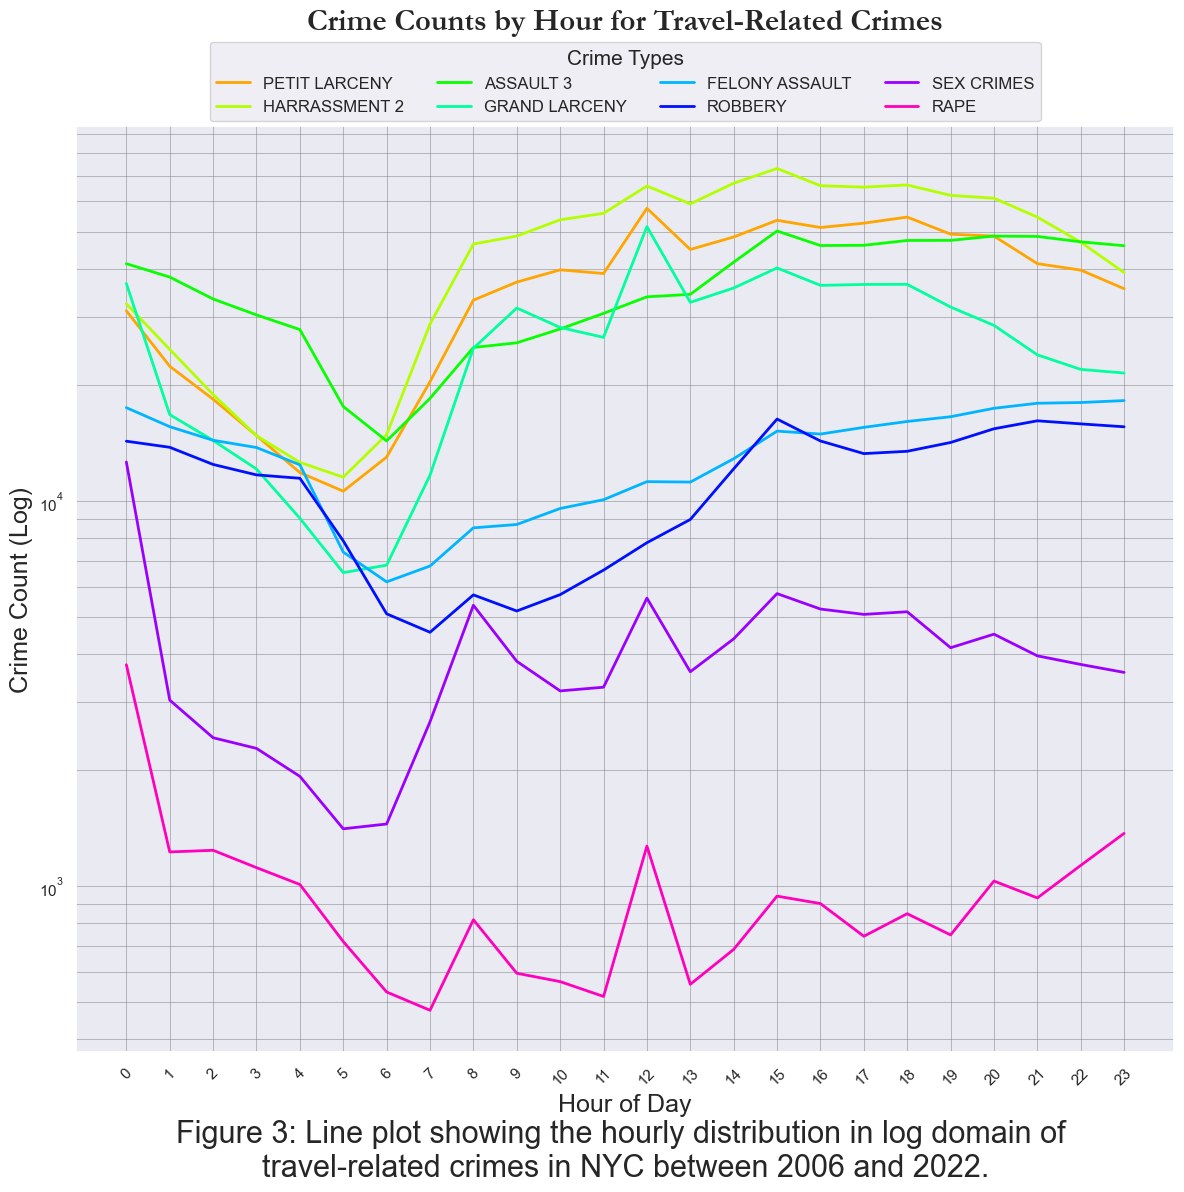

In [24]:
# Make line plot to show hourly changes in crime count for each of the top crimes
df['HourOfDay'] = pd.to_datetime(df['Complaint_From_Time']).dt.hour
# reindex by count of crimes
crimes_of_interest = ['PETIT LARCENY', 'HARRASSMENT 2', 'ASSAULT 3', 'GRAND LARCENY', 'FELONY ASSAULT', 'ROBBERY', 'SEX CRIMES', 'RAPE']

individual_data = df[df['Offense_Description'].isin(crimes_of_interest) & df['Victim_Sex'].isin(['F', 'M'])]
grouped = individual_data.groupby(['HourOfDay', 'Offense_Description']).size().unstack(fill_value=0)

# Ensure the hours are in the correct order, if necessary
hours_order = range(24)  # 0 to 23 hours
grouped = grouped.reindex(hours_order)
# Plot each crime type
plt.figure(figsize=(12, 12))
sns.set_style("darkgrid")
palette = sns.color_palette("hsv", len(crimes_of_interest))
for i, crime in enumerate(crimes_of_interest):
    sns.lineplot(x=grouped.index, y=grouped[crime], label=crime, color=palette[i], linewidth=2)

plt.title('Crime Counts by Hour for Travel-Related Crimes', fontsize=22, pad=70, fontdict={'fontname': 'Garamond', 'weight': 'bold'})
plt.xlabel('Hour of Day', fontsize=18)
plt.ylabel('Crime Count (Log)', fontsize=18)
plt.yscale('log')  # Log scale for better visualization of lower counts
plt.xticks(range(0, 24), rotation=45)  # Show every hour on the x-axis for better readability
# Customizing grid for better visibility
plt.grid(True, which="both", linestyle='-', color='gray', linewidth=0.5, alpha=0.7)
# Adjust the legend to not overlap the plot
plt.legend(title='Crime Types', title_fontsize='15', fontsize='12', loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4)
# adjust vspace between the legend and the plot
plt.subplots_adjust(bottom=0.2, top=0.7)
# add caption saying 'Figure 3: Line plot showing the hourly distribution of travel-related crimes in NYC.'
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust the layout to fit the legend outside

plt.text(0.5, -0.14, 'Figure 3: Line plot showing the hourly distribution in log domain of \ntravel-related crimes in NYC between 2006 and 2022.',
         horizontalalignment='center', fontsize=22, transform=plt.gca().transAxes, wrap=True, verticalalignment='bottom')
plt.tight_layout()
savefile_path = os.path.join(parent_dir, 'figures', 'hourly_crime_counts.png')
plt.savefig(savefile_path, bbox_inches='tight')
plt.show()

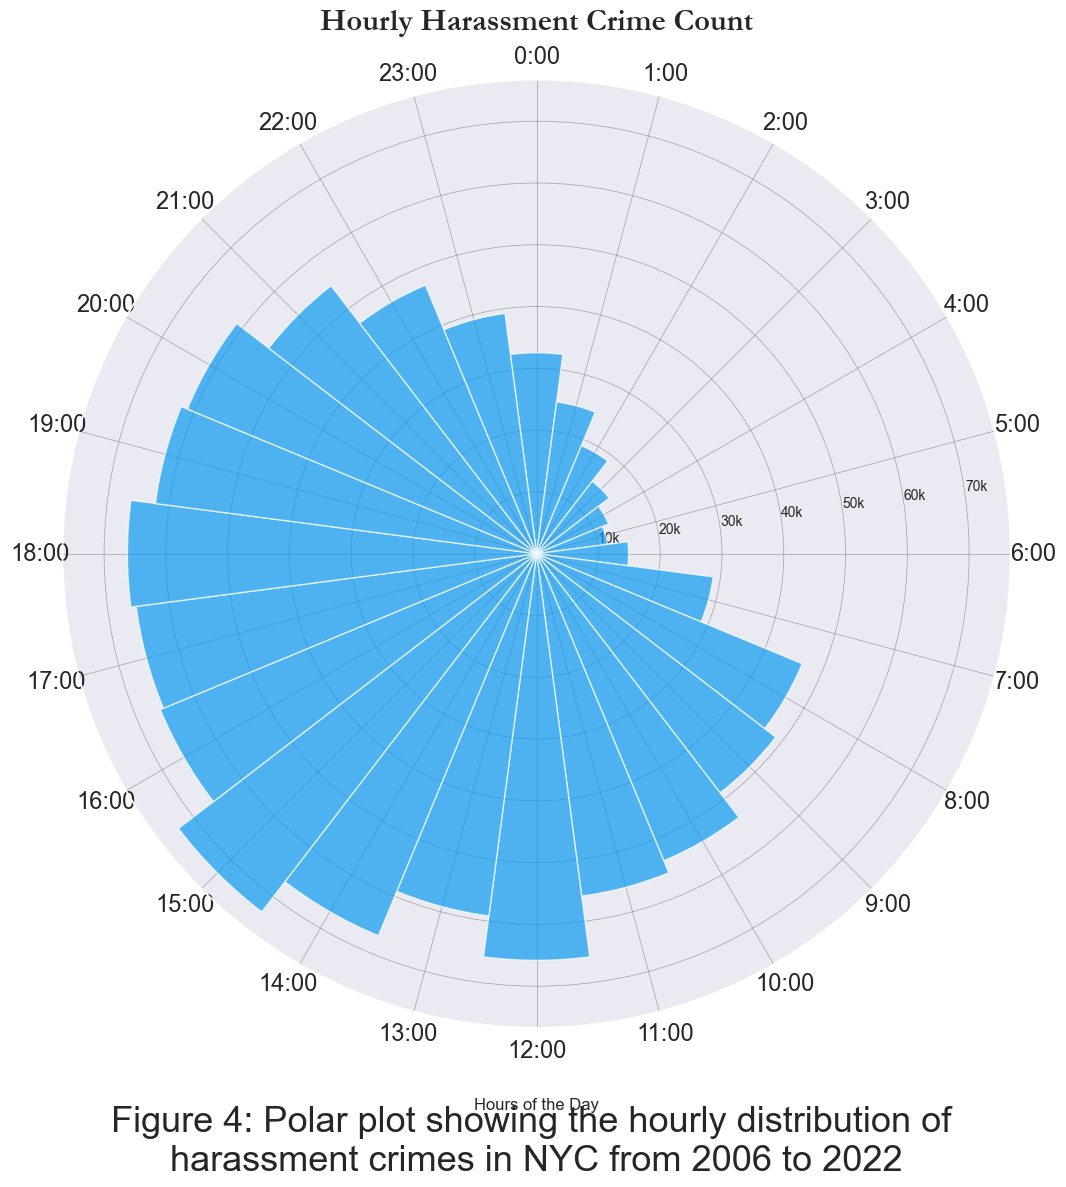

In [30]:
# Filter data for 'HARRASSMENT 2' crimes
harassment_data = df[df['Offense_Description'] == 'HARRASSMENT 2']
# filter for victim sex = "M" or "F"
harassment_data = harassment_data[harassment_data['Victim_Sex'].isin(['M', 'F'])]

# Extract hour information from the 'Time' column
#df['DayOfWeek'] = df['Complaint_From_Date'].dt.day_name()
#harassment_data['Hour'] = df['Complaint_From_Date'].dt.hour
# Complatin from date is formatted as such 06/18/2006
# Complaint_From_Time 16:30:00	
harassment_data['Hour'] = pd.to_datetime(harassment_data['Complaint_From_Time'], format='%H:%M:%S').dt.hour
#harassment_data['Hour'] = pd.to_datetime(harassment_data['Complaint_From_Date'], format='%H:%M').dt.hour

# Count occurrences for each hour
hour_counts = harassment_data['Hour'].value_counts().sort_index()

# Create a polar plot with each bar representing one hour
theta = np.radians(hour_counts.index * (360 / 24))  # Convert hours to degrees
width = np.radians(15)  # Set the width of each bar to 15 degrees (1 hour)
radii = hour_counts.values

# choose rbg color rgb(37, 150, 190)
samecolor = sns.color_palette('hsv',8)[4]
alphacolor = (12/255, 153/255, 240/255)
sns.set_style("darkgrid")

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(12,12))
bars = ax.bar(theta, radii, width=width, color=alphacolor, alpha=0.7)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlabel_position(82)

ax.set_title('Hourly Harassment Crime Count', va='bottom', fontdict={'fontname': 'Garamond', 'weight': 'bold'}, size=22)

# Add axis labels with hour names
ax.set_thetagrids(np.degrees(theta), labels=[f'{i}:00' for i in range(24)], fontsize=17)
ax.set_xlabel('Hours of the Day', labelpad=17)

# change y ticks such taht 10000 is displayed as 10k
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}k'.format(x/1000)))
# set y tick ticks to size 10
ax.yaxis.set_tick_params(labelsize=10)

# show grid
ax.grid(True, which="both", linestyle='-', color='gray', linewidth=0.5, alpha=0.7)
# add caption saying 'Figure 4: Polar plot showing the hourly distribution of harassment crimes in NYC.'
plt.text(0.5, -0.15, 'Figure 4: Polar plot showing the hourly distribution of \nharassment crimes in NYC from 2006 to 2022',
         horizontalalignment='center', fontsize=26, transform=ax.transAxes)
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the layout to fit the legend outside
savefile_path = os.path.join(parent_dir, 'figures', 'hourly_polar_plot.png')
plt.savefig(savefile_path, bbox_inches='tight')
plt.show()

In [ ]:
def darken_color(r, g, b, factor=0.7):
    """Darkens the color by multiplying the RGB values by the factor."""
    return (r * factor, g * factor, b * factor)

# Original RGB color
original_rgb = (37, 150, 190)

# Darken the color
darker_rgb = darken_color(*original_rgb, factor=0.7)  # Reduce brightness by 30%

# Convert RGB to matplotlib color format with alpha
color_with_alpha = [x/255 for x in darker_rgb] + [0.7]

print(f'Original RGB: {original_rgb}')
print(f'Darker RGB: {darker_rgb}')
print(f'Color with Alpha: {color_with_alpha}')

Original RGB: (37, 150, 190)
Darker RGB: (25.9, 105.0, 133.0)
Color with Alpha: [0.10156862745098039, 0.4117647058823529, 0.5215686274509804, 0.7]


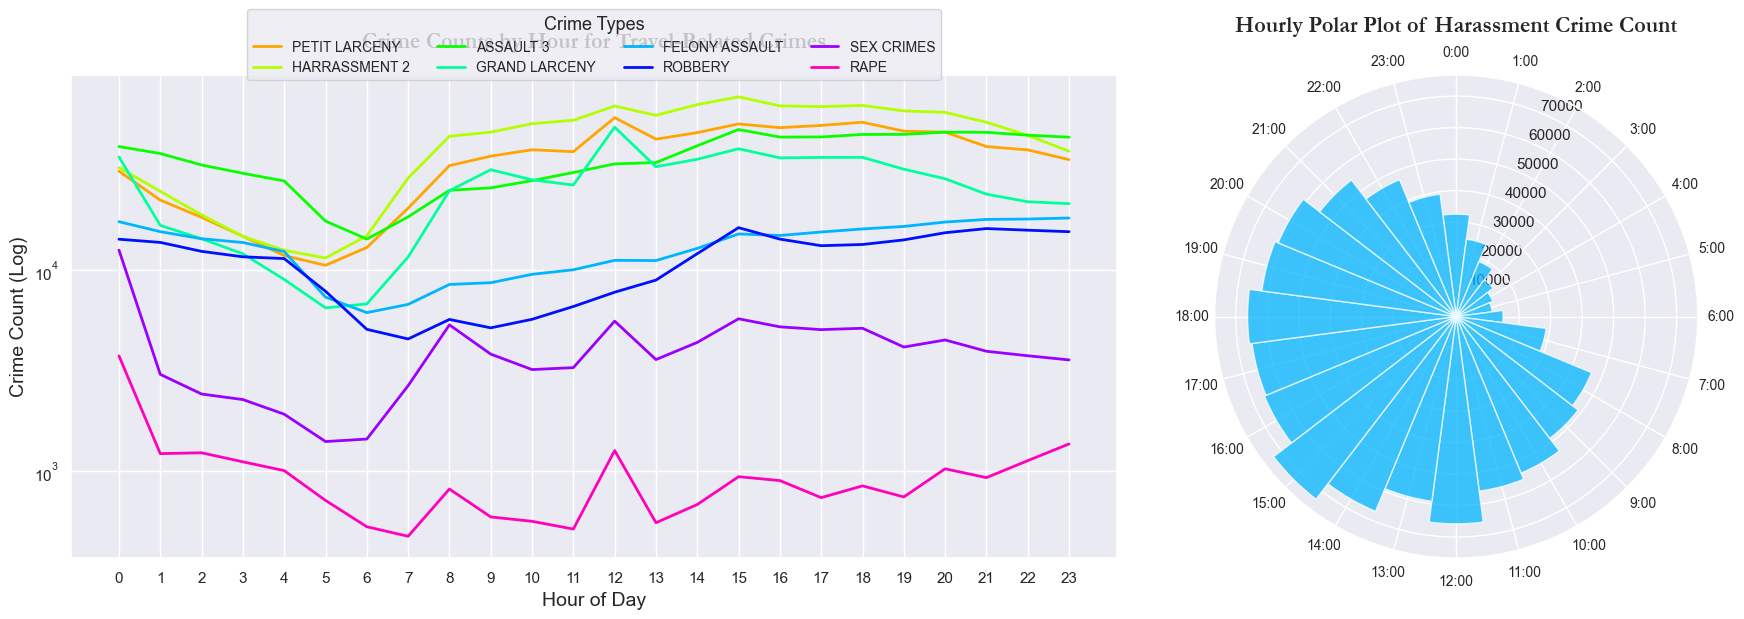

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'grouped' and other data are already prepared as specified in your previous steps.

# Set up the figure and gridspec
fig = plt.figure(figsize=(18, 7))  # Adjust the total figsize to fit both plots appropriately
gs = fig.add_gridspec(1, 2, width_ratios=[65, 35])  # Width ratios according to your request

# Line plot for hourly crime counts
ax1 = fig.add_subplot(gs[0])
palette = sns.color_palette("hsv", len(crimes_of_interest))
for i, crime in enumerate(crimes_of_interest):
    sns.lineplot(x=grouped.index, y=grouped[crime], label=crime, color=palette[i], ax=ax1, linewidth=2)

ax1.set_title('Crime Counts by Hour for Travel-Related Crimes', fontsize=16, pad=20, fontdict={'fontname': 'Garamond', 'weight': 'bold'})
ax1.set_xlabel('Hour of Day', fontsize=14)
ax1.set_ylabel('Crime Count (Log)', fontsize=14)
ax1.set_yscale('log')
ax1.set_xticks(range(0, 24))
# Place the legend above the plot
ax1.legend(title='Crime Types', title_fontsize='13', loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fontsize='10')

# Polar plot for harassment data
ax2 = fig.add_subplot(gs[1], projection='polar')
theta = np.radians(grouped.index * 15)  # Convert hours to degrees
width = np.radians(15)  # Each bar is 15 degrees wide
radii = grouped['HARRASSMENT 2'].values

ax2.bar(theta, radii, width=width, color=sns.color_palette("hsv", 8)[4], alpha=0.75)
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)
ax2.set_title('Hourly Polar Plot of Harassment Crime Count', va='bottom', fontsize=16, fontdict={'fontname': 'Garamond', 'weight': 'bold'})
ax2.set_thetagrids(np.degrees(theta), labels=[f'{i}:00' for i in range(24)], fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to fit the legend and title
plt.show()
